## Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np

## Loading Data

In [2]:
df = pd.read_csv('stackoverflowtags.csv')

In [3]:
df.head()

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"
2,How to terminate windows phone 8.1 app,['c#']
3,get current time in a specific country via jquery,"['javascript', 'jquery']"
4,Configuring Tomcat to Use SSL,['java']


In [4]:
# dimensions of the dataset (rows,columns)
print(df.shape)

(100000, 2)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   100000 non-null  object
 1   tags    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [6]:
# count the number of null values
df.isnull().sum()

title    0
tags     0
dtype: int64

In [7]:
# counts the number of occurences of each unique value in title column
df.title.value_counts()

Conversion failed when converting date and/or time from character string    3
"FormatException was unhandled" Input string was not in a correct format    2
Input string was not in a correct format                                    2
JavaScript runtime error: '$' is undefined                                  2
Object reference not set to an instance of an object                        2
                                                                           ..
NSPredicate predicateWithFormat:(NSString*) inconsistency?                  1
document.location.href is not working in IE                                 1
segmentation fault in C, core dumped, gdb output                            1
C# - are there any events fired right after loading a form?                 1
Create a List of primitive int?                                             1
Name: title, Length: 99984, dtype: int64

In [8]:
# counts the number of occurences of each unique value in tags column
df.tags.value_counts()

['java']                                    7026
['c#']                                      4983
['php']                                     4727
['javascript']                              4531
['python']                                  3879
                                            ... 
['c#', 'xml', 'windows', 'forms']              1
['c#', 'c++', 'c', 'visual-studio-2010']       1
['java', 'file', 'datetime']                   1
['c#', 'css', 'asp.net', 'asp.net-mvc']        1
['ios', 'xcode', 'facebook', 'swift']          1
Name: tags, Length: 7066, dtype: int64

## Drop Duplicates

In [9]:
# counts the number of duplicated rows in a dataframe 
df.duplicated().sum()

1

In [10]:
df

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"
2,How to terminate windows phone 8.1 app,['c#']
3,get current time in a specific country via jquery,"['javascript', 'jquery']"
4,Configuring Tomcat to Use SSL,['java']
...,...,...
99995,"Obj-c, incorrect checksum for freed object - o...","['iphone', 'objective-c', 'ios', 'cocoa-touch']"
99996,How to connect via HTTPS using Jsoup?,"['java', 'android']"
99997,Python Pandas Series of Datetimes to Seconds S...,"['python', 'datetime', 'pandas']"
99998,jqGrid issue grouping - Duplicate rows get app...,"['javascript', 'jquery']"


In [11]:
# new dataframe duplicates contains all rows in df that have duplicate value in title column
duplicates = df[df.duplicated(['title'])]

In [12]:
duplicates

,title,tags
24560,Uncaught SyntaxError: Unexpected identifier,"['javascript', 'php', 'html']"
36354,Conversion failed when converting date and/or ...,"['c#', 'asp.net', 'sql', 'datetime']"
42442,No rule to make target,['c']
43324,No such file or directory @ rb_sysopen,"['ruby', 'csv']"
45733,The underlying connection was closed: The conn...,"['c#', 'asp.net', 'web-services']"
68962,Conversion failed when converting date and/or ...,['vb.net']
70546,Object reference not set to an instance of an ...,"['c#', 'asp.net-mvc']"
79008,Uncaught Reference Error: function is not defined,"['javascript', 'html', 'forms']"
90134,System.NullReferenceException: Object referenc...,"['c#', 'image']"
91168,Could not find default endpoint element that r...,"['c#', '.net', 'wcf']"


In [13]:
# subset 'title' means only title column used for identifying duplicates, 
# keep 'first' occurence, inplace 'true' means original dataframe should be modified 
df.drop_duplicates(subset='title' , keep = 'first' , inplace = True)

In [14]:
df

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"
2,How to terminate windows phone 8.1 app,['c#']
3,get current time in a specific country via jquery,"['javascript', 'jquery']"
4,Configuring Tomcat to Use SSL,['java']
...,...,...
99995,"Obj-c, incorrect checksum for freed object - o...","['iphone', 'objective-c', 'ios', 'cocoa-touch']"
99996,How to connect via HTTPS using Jsoup?,"['java', 'android']"
99997,Python Pandas Series of Datetimes to Seconds S...,"['python', 'datetime', 'pandas']"
99998,jqGrid issue grouping - Duplicate rows get app...,"['javascript', 'jquery']"


In [15]:
# counts the number of occurences of each unique value in title column
df.title.value_counts()

How to draw a stacked dotplot in R?                                            1
Hibernate JPA - ManyToOne relationship not populated                           1
how to work treeview nodes contains in asp.net?                                1
Initialize script                                                              1
ASP.NET C# Must declare the scalar variable                                    1
                                                                              ..
Can jquery animate the css background property?                                1
how to access variable from php in jquery using ajax(here i am using Json)     1
Best way to handle session management in spring mvc filters or interceptors    1
Can't run the .java file                                                       1
Create a List of primitive int?                                                1
Name: title, Length: 99984, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99984 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   99984 non-null  object
 1   tags    99984 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


## Data Cleaning & Stemming

In [17]:
import re
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [18]:
# retruns datatype of each column in the df dataframe 
df.dtypes

title    object
tags     object
dtype: object

In [19]:
df['title'].dtype

dtype('O')

In [20]:
df['tags'].dtype

dtype('O')

In [21]:
# function for text cleaning

def clean(text):
    #convert text to string 
    text=str(text) 
    #convert text to lowercase
    text = text.lower()
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    # removing html tags
    html = re.compile('<.*?>')
    cleaned = re.sub(html, ' ', text)
    fil=[]
    for i in cleaned.split():    # splits the text and repalces the unwanted characters with ''
        if i!='c++':
            # remove everything except alphabets
            cleaned=re.sub('[^A-Za-z]', '', i)
            fil.append(cleaned)
        else:
            fil.append(i)
    return fil                  #returning the cleaned text 

In [22]:
df['title']

0                      How to draw a stacked dotplot in R?
1        mysql select all records where a datetime fiel...
2                   How to terminate windows phone 8.1 app
3        get current time in a specific country via jquery
4                            Configuring Tomcat to Use SSL
                               ...                        
99995    Obj-c, incorrect checksum for freed object - o...
99996                How to connect via HTTPS using Jsoup?
99997    Python Pandas Series of Datetimes to Seconds S...
99998    jqGrid issue grouping - Duplicate rows get app...
99999                      Create a List of primitive int?
Name: title, Length: 99984, dtype: object

In [23]:
# applying clean function to title column of df dataframe 
# lambda is the function used to apply the function to each element of the column 
# resulting output are cleaned title values which are assigned back to title column
df.loc[:,'title']=df.loc[:,'title'].apply(lambda x: clean(x))

In [24]:
df['title']

0              [how, to, draw, a, stacked, dotplot, in, r]
1        [mysql, select, all, records, where, a, dateti...
2              [how, to, terminate, windows, phone, , app]
3        [get, current, time, in, a, specific, country,...
4                      [configuring, tomcat, to, use, ssl]
                               ...                        
99995    [objc, incorrect, checksum, for, freed, object...
99996         [how, to, connect, via, https, using, jsoup]
99997    [python, pandas, series, of, datetimes, to, se...
99998    [jqgrid, issue, grouping, , duplicate, rows, g...
99999                [create, a, list, of, primitive, int]
Name: title, Length: 99984, dtype: object

## Plot

In [25]:
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Function to visualize the words and frequency in title
# x is a list, terms is an integer 
def freqwords(x, terms): 
    
    # concatenating all words in list x into a single string 
  allwords = ' '.join([str(y) for y in x]) 
    # split string into individual words 
  allwords = allwords.split() 
    # creating frequency distribution
  fdist = nltk.FreqDist(allwords) 
    # 'word' column contains unique words from frequency distribution 
    # 'count' column contains the frequency 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # select the top terms from the dataframe based on frequency count 
  d = wordsdf.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
    # creating Barplot function to visualize top terms 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word')
    # displaying the plot 
  plt.show()

Graph to visualize the words and frequency in 'title' column.




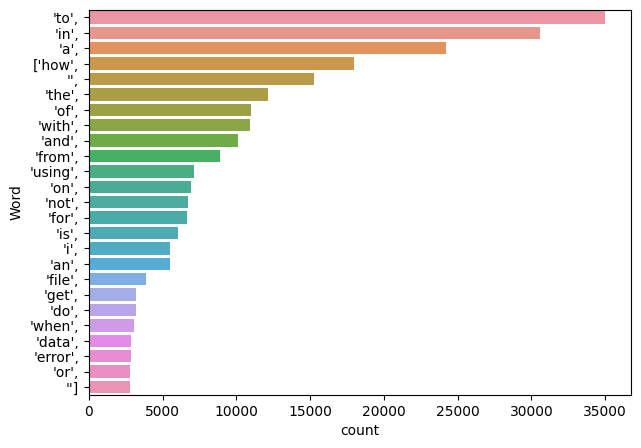

In [27]:
print("Graph to visualize the words and frequency in 'title' column.\n\n")
# print 25 most frequent words 
freqwords(df['title'], 25)

## Stemming

In [28]:
# creating a set of english language stopwords 
stop_words = set(stopwords.words('english'))
# using snowball stemmer to stem english words 
stemmer = SnowballStemmer('english')

In [29]:
# function for removing stop words and stemming data

def stem(text):
    fil=[]                                         # initializing an empty list to store stemmed words 
    for i in text:
        if i not in stop_words :
            # using stem function to reduce word to its root form 
            text=(stemmer.stem(i).encode('utf8'))  # encoding the data to utf-8
            fil.append(text)                       # appending to the fil list 
    text=b' '.join(fil)                            # stemmed words in fil list joined together to a single byte string 
    return text

In [30]:
# applying stem function to title column of df dataframe 
# lambda is the function used to apply the function to each element of the column 
# resulting output are cleaned title values which are assigned back to title column
df.loc[:,'title']=df.loc[:,'title'].apply(lambda x: stem(x))

In [31]:
df.title

0                                  b'draw stack dotplot r'
1        b'mysql select record datetim field less speci...
2                              b'termin window phone  app'
3            b'get current time specif countri via jqueri'
4                               b'configur tomcat use ssl'
                               ...                        
99995    b'objc incorrect checksum freed object  object...
99996                       b'connect via https use jsoup'
99997       b'python panda seri datetim second sinc epoch'
99998    b'jqgrid issu group  duplic row get append eve...
99999                             b'creat list primit int'
Name: title, Length: 99984, dtype: object

Graph to visualize the words and frequency in 'title' column.




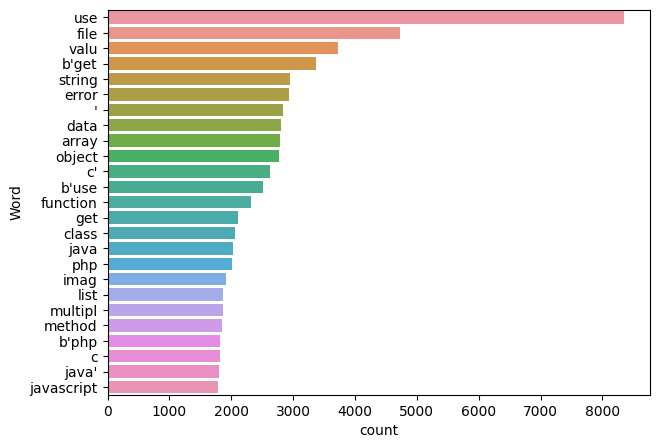

In [32]:
print("Graph to visualize the words and frequency in 'title' column.\n\n")
# print 25 most frequent words 
freqwords(df['title'], 25)

## Creating columns for cleaned Title & Tags

In [33]:
# creating empty list ques, each title is appended to this list  
ques=[]
for i in df.title:
    ques.append(i)
# new column added to dataframe df and ques list is assigned to it 
df['cleanQues'] = ques

In [34]:
# creating empty list ctags, for each tag re.sub is used to remove anything but alphabets and #+-
ctags=[]
for i in df.tags:
    # cleaned result appended to ctags list 
    ctags.append(re.sub('[^A-Za-z#+-]', ' ', i))
# new column added to dataframe df and ctags list assigned to it 
df['cleanTags']=ctags

In [35]:
df

,title,tags,cleanQues,cleanTags
0,b'draw stack dotplot r',['r'],b'draw stack dotplot r',r
1,b'mysql select record datetim field less speci...,"['php', 'mysql']",b'mysql select record datetim field less speci...,php mysql
2,b'termin window phone app',['c#'],b'termin window phone app',c#
3,b'get current time specif countri via jqueri',"['javascript', 'jquery']",b'get current time specif countri via jqueri',javascript jquery
4,b'configur tomcat use ssl',['java'],b'configur tomcat use ssl',java
...,...,...,...,...
99995,b'objc incorrect checksum freed object object...,"['iphone', 'objective-c', 'ios', 'cocoa-touch']",b'objc incorrect checksum freed object object...,iphone objective-c ios cocoa-touch
99996,b'connect via https use jsoup',"['java', 'android']",b'connect via https use jsoup',java android
99997,b'python panda seri datetim second sinc epoch',"['python', 'datetime', 'pandas']",b'python panda seri datetim second sinc epoch',python datetime pandas
99998,b'jqgrid issu group duplic row get append eve...,"['javascript', 'jquery']",b'jqgrid issu group duplic row get append eve...,javascript jquery


## Creating New Dataset

In [36]:
# creating new dataframe d
d=pd.DataFrame()
# title column is populated with cleanQues column of df dataframe 
d['title']=df.cleanQues
# tags column is populated with cleanTags column of df dataframe 
d['tags']=df.cleanTags
# to_csv function used to convert dataframe d to a csv file
d.to_csv('datafinal',index=False)

In [37]:
df = pd.read_csv('datafinal')

In [38]:
df.head(10)

,title,tags
0,b'draw stack dotplot r',r
1,b'mysql select record datetim field less speci...,php mysql
2,b'termin window phone app',c#
3,b'get current time specif countri via jqueri',javascript jquery
4,b'configur tomcat use ssl',java
5,b'awesom nest set plugin add new children tre...,ruby-on-rails
6,b'creat map json respons rubi rail ',ruby ruby-on-rails- json
7,b'rspec test method call',ruby
8,b'springboot catalina lifecycl except',java spring spring-mvc
9,b'import data excel mysql databas use php',php codeigniter


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99984 entries, 0 to 99983
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   99984 non-null  object
 1   tags    99984 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


## Splitting Dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# splitting the data in dataframe df into training and testing sets 
# test_size = 0.2 means 20% data used for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split(df.title, df.tags, test_size=0.2, random_state=9)

## Converting Title & Tags to Vectors

In [42]:
# using Tfid & Count Vectorizer to convert data to vectors so that we can train and test data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
# using tfidf vectorizer to transform the data in x_train and x_test sets into tf-idf vectors 
tfidf_vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2",
                            sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = tfidf_vectorizer.fit_transform(x_train)
x_test_multilabel = tfidf_vectorizer.transform(x_test)

In [44]:
# using count vectorizer to transform the data in y_train and y_test into a matrix of occurence counts 
count_vectorizer = CountVectorizer(binary='true')
y_train_multilabel = count_vectorizer.fit_transform(y_train)
y_test_multilabel = count_vectorizer.transform(y_test)

## Training using OneVSRest and Stochastic Gradient Descent

In [45]:
# using multi-class classification to classify the tags
# classifiers like One-Vs-Rest classifier and Stochastic Gradient Descent Classifier
# OneVSRest classifier is used to perform multi label classification 
# Stochastic Gradient Descent Classifiier is used along for multi label 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix, multilabel_confusion_matrix

In [46]:
# training SGD classifier using OneVsRest Classifier wrapper for multi label 
classifier = OneVsRestClassifier(SGDClassifier(loss='log', max_iter = 5, tol = None, alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train_multilabel)
# once classifier trained it is used to make predictions 
predictions = classifier.predict(x_test_multilabel)

In [47]:
# printing evaluation metrics 
print("One-VS-Rest Classifier \n\n")
# proportion of labels correctly predicted
print("Accuracy Score :",metrics.accuracy_score(y_test_multilabel,predictions))
print("Macro f1 score :",metrics.f1_score(y_test_multilabel, predictions, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test_multilabel, predictions, average = 'micro'))
# fraction of labels incorrectly predicted
print("Hamming loss :",metrics.hamming_loss(y_test_multilabel,predictions))

One-VS-Rest Classifier
Accuracy Score : 0.42111316697504625
Macro f1 score : 0.5244810972181991
Micro f1 scoore : 0.6647932149447275
Hamming loss : 0.010002005351307746


## Classification Report & Confusion Matrix

In [48]:
print("Report : \n\n")
# f1 score is a metric for evaluating the performance fo classification models
print(classification_report(y_test_multilabel,predictions))

Report : 


              precision    recall  f1-score   support

           0       0.80      0.51      0.62       338
           1       0.25      0.04      0.06        84
           2       0.94      0.54      0.69       588
           3       0.97      0.72      0.83       264
           4       0.62      0.19      0.29        83
           5       0.59      0.35      0.44       484
           6       0.84      0.42      0.56       984
           7       0.82      0.70      0.76       105
           8       0.33      0.05      0.09        96
           9       0.11      0.01      0.02        90
          10       0.98      0.75      0.85       161
          11       0.69      0.27      0.38       364
          12       0.75      0.66      0.70        89
          13       0.25      0.05      0.08       155
          14       0.46      0.19      0.27       138
          15       0.42      0.21      0.28       115
          16       0.99      0.75      0.85       412
          17   

C:\Users\nipun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nipun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(predictions)

  (0, 77)	1
  (1, 10)	1
  (1, 61)	1
  (2, 26)	1
  (3, 11)	1
  (4, 34)	1
  (7, 33)	1
  (8, 63)	1
  (9, 61)	1
  (10, 54)	1
  (10, 65)	1
  (10, 68)	1
  (11, 2)	1
  (11, 33)	1
  (12, 29)	1
  (12, 34)	1
  (13, 5)	1
  (13, 54)	1
  (13, 65)	1
  (13, 68)	1
  (14, 33)	1
  (16, 50)	1
  (17, 10)	1
  (17, 61)	1
  (18, 33)	1
  :	:
  (19978, 34)	1
  (19979, 50)	1
  (19980, 49)	1
  (19980, 61)	1
  (19981, 54)	1
  (19981, 65)	1
  (19981, 68)	1
  (19983, 0)	1
  (19983, 35)	1
  (19983, 61)	1
  (19984, 6)	1
  (19984, 50)	1
  (19985, 33)	1
  (19985, 48)	1
  (19985, 76)	1
  (19986, 61)	1
  (19987, 61)	1
  (19988, 34)	1
  (19990, 90)	1
  (19992, 29)	1
  (19992, 34)	1
  (19993, 33)	1
  (19993, 45)	1
  (19996, 29)	1
  (19996, 34)	1


In [50]:
print ('Report : ')
# [[True Negatives    False Positives]
#  [False Negatives    True Positives]]
    print(multilabel_confusion_matrix(y_test_multilabel,predictions))

Report : 
[[[19616    43]
  [  166   172]]

 [[19904     9]
  [   81     3]]

 [[19389    20]
  [  269   319]]

 [[19727     6]
  [   74   190]]

 [[19904    10]
  [   67    16]]

 [[19394   119]
  [  314   170]]

 [[18937    76]
  [  570   414]]

 [[19876    16]
  [   31    74]]

 [[19891    10]
  [   91     5]]

 [[19899     8]
  [   89     1]]

 [[19834     2]
  [   41   120]]

 [[19590    43]
  [  267    97]]

 [[19888    20]
  [   30    59]]

 [[19821    21]
  [  148     7]]

 [[19828    31]
  [  112    26]]

 [[19849    33]
  [   91    24]]

 [[19582     3]
  [  104   308]]

 [[19914    10]
  [   57    16]]

 [[19797    16]
  [   78   106]]

 [[19855    13]
  [   67    62]]

 [[19884    19]
  [   43    51]]

 [[19889     6]
  [   25    77]]

 [[19864     9]
  [  124     0]]

 [[19774    42]
  [  148    33]]

 [[19855    13]
  [   68    61]]

 [[19893     9]
  [   93     2]]

 [[19905    13]
  [   40    39]]

 [[19895    22]
  [   29    51]]

 [[19844     8]
  [   58    87]]

 [[1

In [52]:
import pickle

In [53]:
# storing models to .sav files to use model beyond runtime fo program 
model_data = 'model_data.sav'
tfidf_data = 'tfidf_data.sav'
bow_data = 'bow_data.sav'

In [54]:
pickle.dump(classifier, open(model_data, 'wb'))
pickle.dump(tfidf_vectorizer, open(tfidf_data, 'wb'))
pickle.dump(count_vectorizer, open(bow_data, 'wb'))

In [55]:
pickle.dump(classifier, open('model_data.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_data.pkl', 'wb'))
pickle.dump(count_vectorizer, open('bow_data.pkl', 'wb'))